### Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [9]:
dataset = pd.read_csv('vaccination.csv')
dataset.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,8/20/2021,1201286.0,770542.0,3.086,1.979,430744.0,1.107,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,Albania,ALB,EURO,OWID,8/17/2021,1340339.0,764997.0,46.575,26.583,575342.0,19.992,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.0
2,Algeria,DZA,AFRO,REPORTING,8/23/2021,4146091.0,3421279.0,9.455,7.802,724812.0,1.653,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",1/30/2021,3.0
3,American Samoa,ASM,WPRO,REPORTING,8/9/2021,52769.0,29210.0,95.601,52.920,24104.0,43.669,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",12/21/2020,3.0
4,Andorra,AND,EURO,OWID,8/15/2021,91660.0,51044.0,118.631,66.064,40616.0,52.567,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,2.0


### General Information

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               227 non-null    object 
 1   ISO3                                  227 non-null    object 
 2   WHO_REGION                            227 non-null    object 
 3   DATA_SOURCE                           227 non-null    object 
 4   DATE_UPDATED                          227 non-null    object 
 5   TOTAL_VACCINATIONS                    226 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         218 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             226 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  218 non-null    float64
 9   PERSONS_FULLY_VACCINATED              216 non-null    float64
 10  PERSONS_FULLY_VACCINATED_PER100       216 non-null    float64
 11  VACCINES_USED      

### Missing Data Management

In [11]:
## Get percentage of missing values in each feature 
#
NAN = [(clm_name, dataset[clm_name].isna().mean()*100) for clm_name in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN


,column_name,percentage
0,COUNTRY,0.000000
1,ISO3,0.000000
2,WHO_REGION,0.000000
3,DATA_SOURCE,0.000000
4,DATE_UPDATED,0.000000
5,TOTAL_VACCINATIONS,0.440529
6,PERSONS_VACCINATED_1PLUS_DOSE,3.964758
7,TOTAL_VACCINATIONS_PER100,0.440529
8,PERSONS_VACCINATED_1PLUS_DOSE_PER100,3.964758
9,PERSONS_FULLY_VACCINATED,4.845815


In [6]:
## Columns that has 30 or more than 30 percent missing values
# will be drop from dataset.
#
threshold = len(dataset) * 0.7
dataset = dataset.dropna(axis = 1, thresh = threshold)

NAN = [(clm_name, dataset[clm_name].isna().mean()*100) for clm_name in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,COUNTRY,0.000000
1,ISO3,0.000000
2,WHO_REGION,0.000000
3,DATA_SOURCE,0.000000
4,DATE_UPDATED,0.000000
5,TOTAL_VACCINATIONS,0.440529
6,PERSONS_VACCINATED_1PLUS_DOSE,3.964758
7,TOTAL_VACCINATIONS_PER100,0.440529
8,PERSONS_VACCINATED_1PLUS_DOSE_PER100,3.964758
9,PERSONS_FULLY_VACCINATED,4.845815


In [7]:
## Manage each features missing data
#
dataset.TOTAL_VACCINATIONS = dataset.TOTAL_VACCINATIONS.fillna(int(dataset.TOTAL_VACCINATIONS.mean()))
dataset.PERSONS_VACCINATED_1PLUS_DOSE = dataset.PERSONS_VACCINATED_1PLUS_DOSE.fillna(int(dataset.PERSONS_VACCINATED_1PLUS_DOSE.mean()))
dataset.TOTAL_VACCINATIONS_PER100 = dataset.TOTAL_VACCINATIONS_PER100.fillna(dataset.TOTAL_VACCINATIONS_PER100.mean())
dataset.PERSONS_VACCINATED_1PLUS_DOSE_PER100 = dataset.PERSONS_VACCINATED_1PLUS_DOSE_PER100.fillna(dataset.PERSONS_VACCINATED_1PLUS_DOSE_PER100.mean())
dataset.PERSONS_FULLY_VACCINATED = dataset.PERSONS_FULLY_VACCINATED.fillna(dataset.PERSONS_FULLY_VACCINATED.mean())
dataset.PERSONS_FULLY_VACCINATED_PER100 = dataset.PERSONS_FULLY_VACCINATED_PER100.fillna(dataset.PERSONS_FULLY_VACCINATED_PER100.mean())
dataset.VACCINES_USED = dataset.VACCINES_USED.fillna(dataset.VACCINES_USED.mode()[0])
dataset.NUMBER_VACCINES_TYPES_USED = dataset.NUMBER_VACCINES_TYPES_USED.fillna(int(dataset.NUMBER_VACCINES_TYPES_USED.mean()))


NAN = [(clm_name, dataset[clm_name].isna().mean()*100) for clm_name in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,COUNTRY,0.0
1,ISO3,0.0
2,WHO_REGION,0.0
3,DATA_SOURCE,0.0
4,DATE_UPDATED,0.0
5,TOTAL_VACCINATIONS,0.0
6,PERSONS_VACCINATED_1PLUS_DOSE,0.0
7,TOTAL_VACCINATIONS_PER100,0.0
8,PERSONS_VACCINATED_1PLUS_DOSE_PER100,0.0
9,PERSONS_FULLY_VACCINATED,0.0


### Outliers

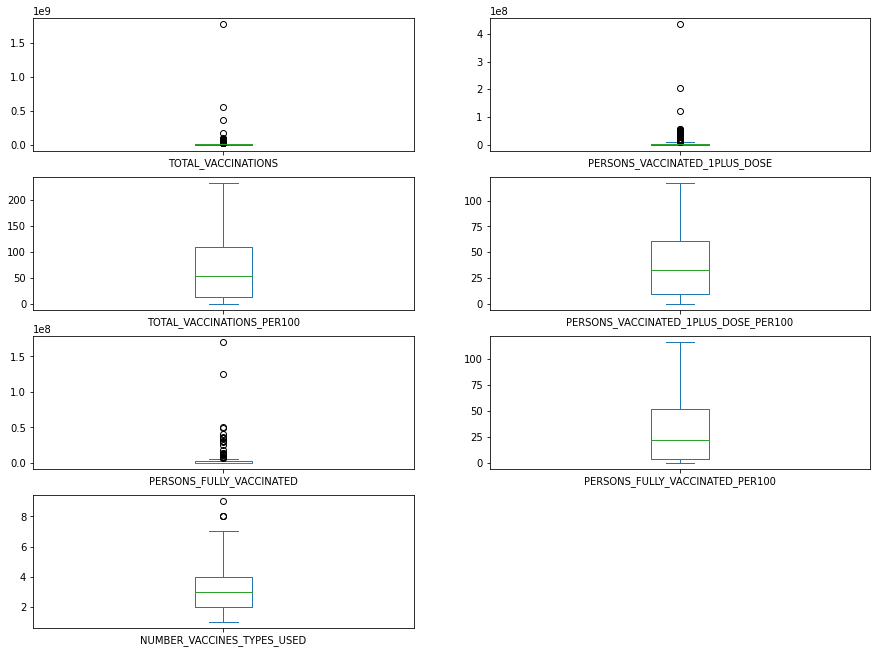

In [12]:
## Box plot
# We are not handling these outliers because we know it is valid data not an error
#
dataset.plot(kind = 'box',
            subplots = True,
            layout = (7, 2),
            figsize = (15,20))
plt.show()
plt.close()

### Statistical Information

In [13]:
## Now when we handle our data in better way then its good time to check the statistical information of 
# dataset
dataset.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,2.260000e+02,2.180000e+02,226.000000,218.000000,2.160000e+02,216.000000,223.000000
mean,2.044237e+07,8.253955e+06,63.128195,35.854991,4.889511e+06,28.128968,3.219731
std,1.268902e+08,3.473510e+07,51.608722,26.885016,1.641628e+07,25.239769,1.703511
min,7.300000e+01,3.700000e+01,0.078000,0.067000,3.600000e+01,0.007000,1.000000
25%,9.987875e+04,6.933075e+04,13.012250,9.629000,3.332500e+04,3.701500,2.000000
50%,8.988110e+05,5.660505e+05,53.314500,32.594000,3.247290e+05,22.023000,3.000000
75%,6.258963e+06,3.764875e+06,109.896250,61.083750,2.511654e+06,51.619500,4.000000
max,1.776816e+09,4.357201e+08,233.208000,116.933000,1.701386e+08,116.274000,9.000000


### Summarization

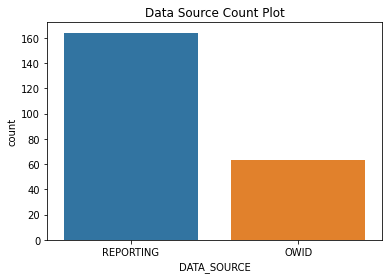

In [14]:
## Countplot 
#
sns.countplot(data = dataset, x = 'DATA_SOURCE')
plt.title("Data Source Count Plot")
plt.show()
plt.close()

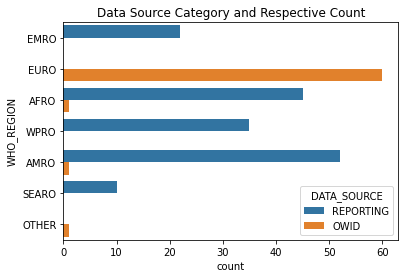

In [15]:
## Region and count of each data source
#
sns.countplot(data = dataset, y = 'WHO_REGION', hue = 'DATA_SOURCE')
plt.title("Data Source Category and Respective Count")
plt.show()
plt.close()

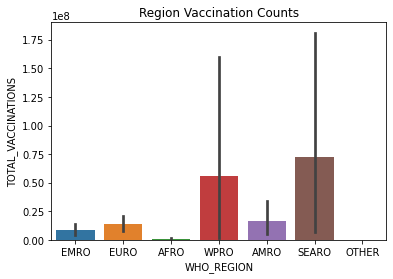

In [17]:
## Region having more vaccination
#
sns.barplot(data = dataset,x = 'WHO_REGION', y = 'TOTAL_VACCINATIONS')
plt.title("Region Vaccination Counts")
plt.show()
plt.close()

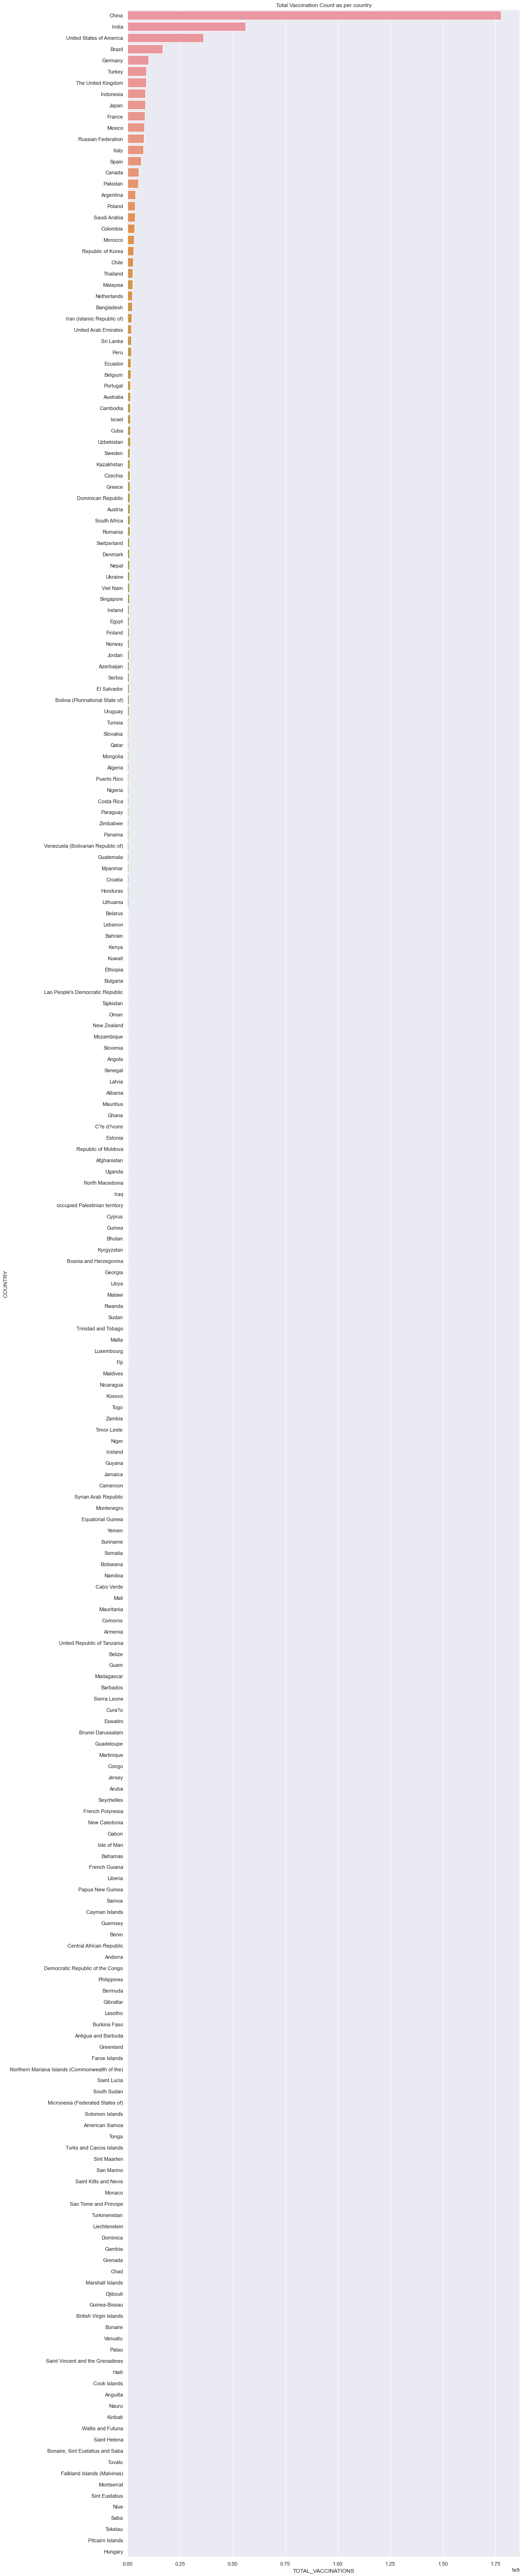

In [19]:
## Lets see total vaccination count of each country
sns.barplot(data = dataset, x = 'TOTAL_VACCINATIONS', 
            y = 'COUNTRY', 
            order = dataset.sort_values('TOTAL_VACCINATIONS', ascending = False).COUNTRY)

sns.set(rc = {'figure.figsize':(15,100)})
plt.title("Total Vaccination Count as per country")
plt.show()
plt.close()

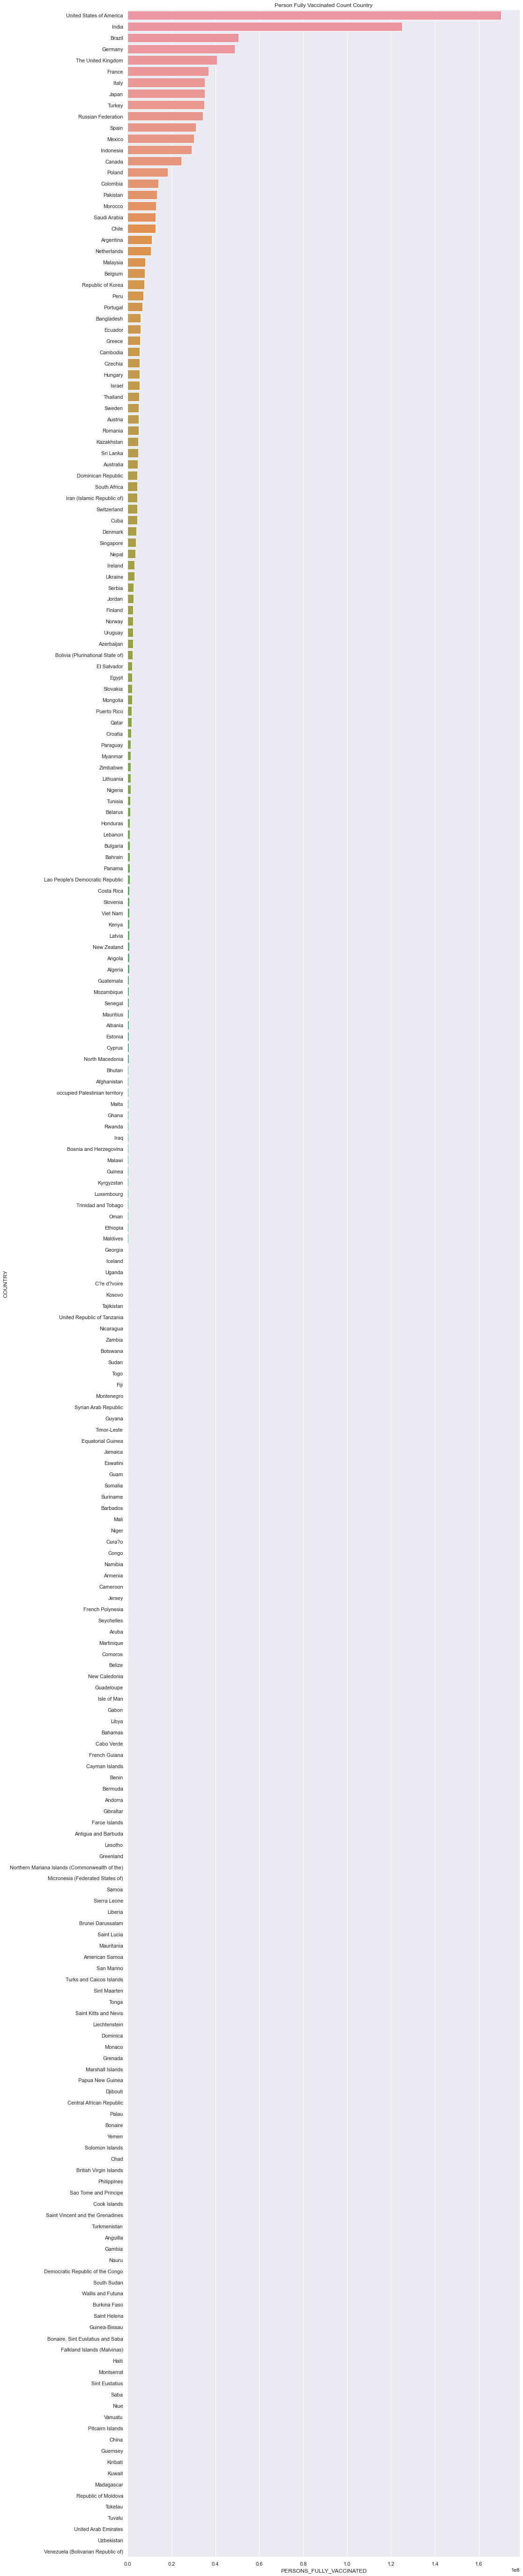

In [20]:
## Person fully vaccinated count as per country
#
sns.barplot(data = dataset, x = 'PERSONS_FULLY_VACCINATED', 
            y = 'COUNTRY', 
            order = dataset.sort_values('PERSONS_FULLY_VACCINATED', ascending = False).COUNTRY)

plt.title("Person Fully Vaccinated Count Country")
sns.set(rc = {'figure.figsize':(15,100)})
plt.show()
plt.close()

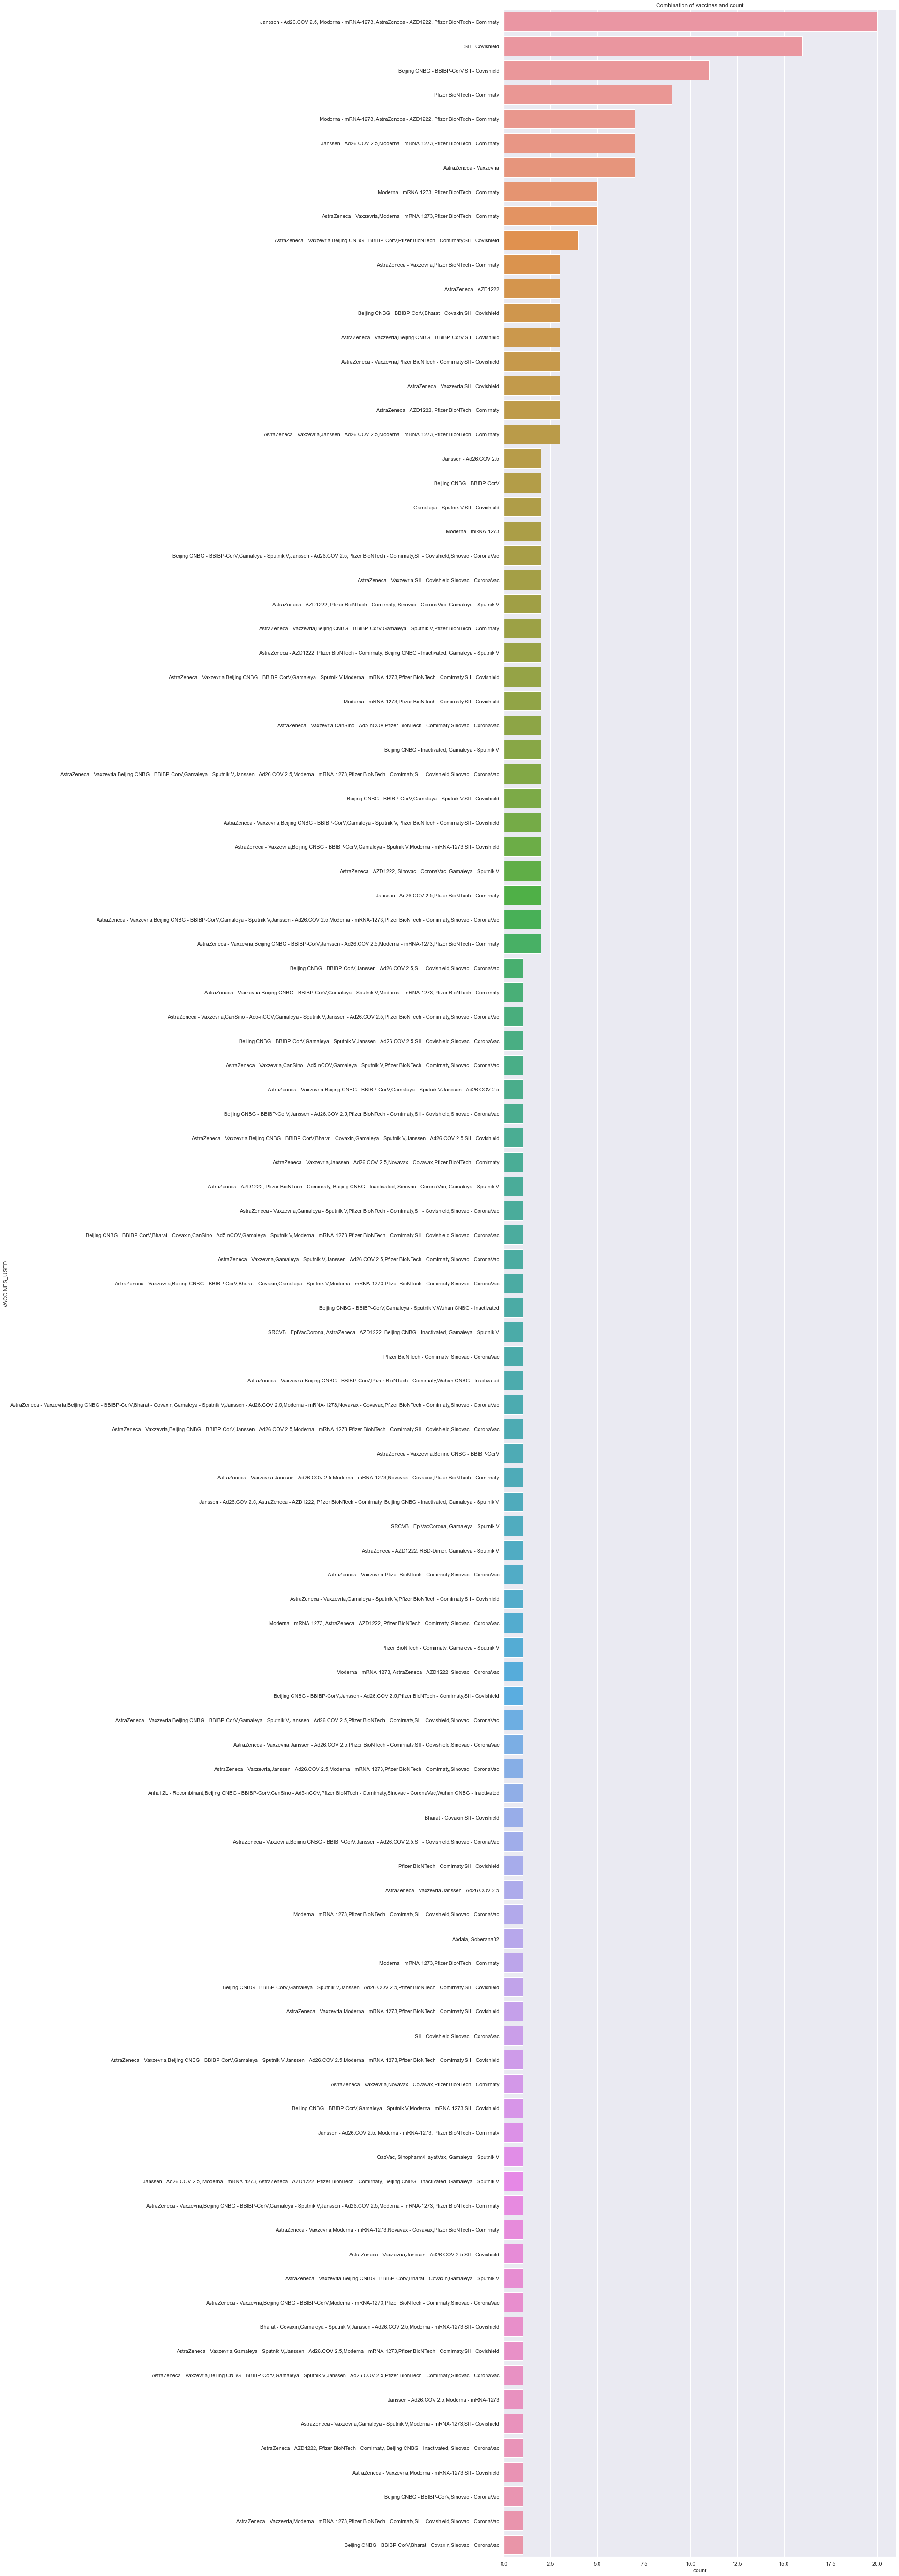

In [21]:
## Combination of vaccines are used count
sns.countplot(data = dataset, y = 'VACCINES_USED', order = dataset['VACCINES_USED'].value_counts().index)
plt.title("Combination of vaccines and count")
plt.show()
plt.close()

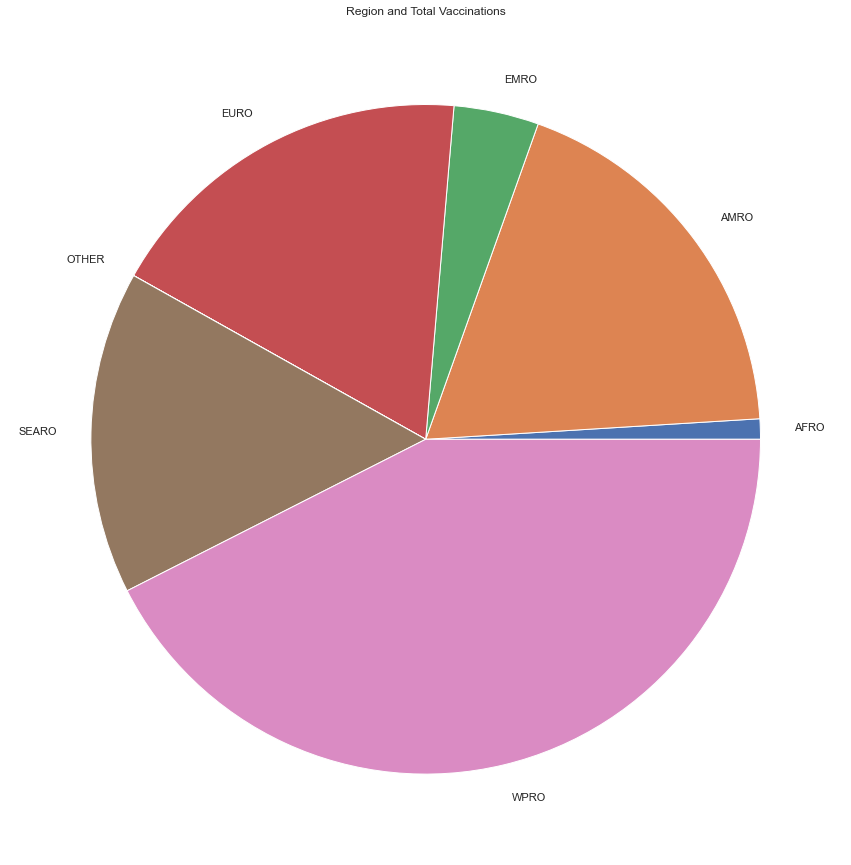

In [22]:
## Total vaccinations as per Region
#
region_count = dataset.groupby('WHO_REGION')['TOTAL_VACCINATIONS'].sum()
lab = region_count.index.tolist()
data = region_count.values.tolist()

plt.title("Region and Total Vaccinations")
plt.pie(data, labels = lab)
plt.show()
plt.close()

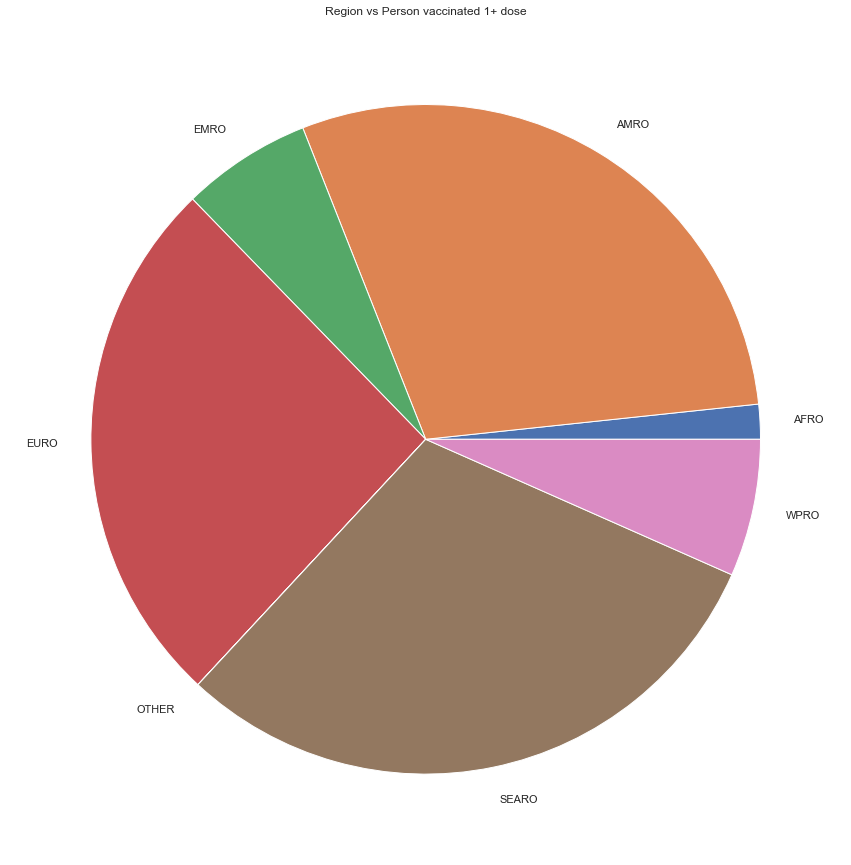

In [23]:
## Region vs Person vaccinated 1+ dose
#
region_count = dataset.groupby('WHO_REGION')['PERSONS_VACCINATED_1PLUS_DOSE'].sum()
lab = region_count.index.tolist()
data = region_count.values.tolist()

plt.title("Region vs Person vaccinated 1+ dose")
plt.pie(data, labels = lab)
plt.show()
plt.close()

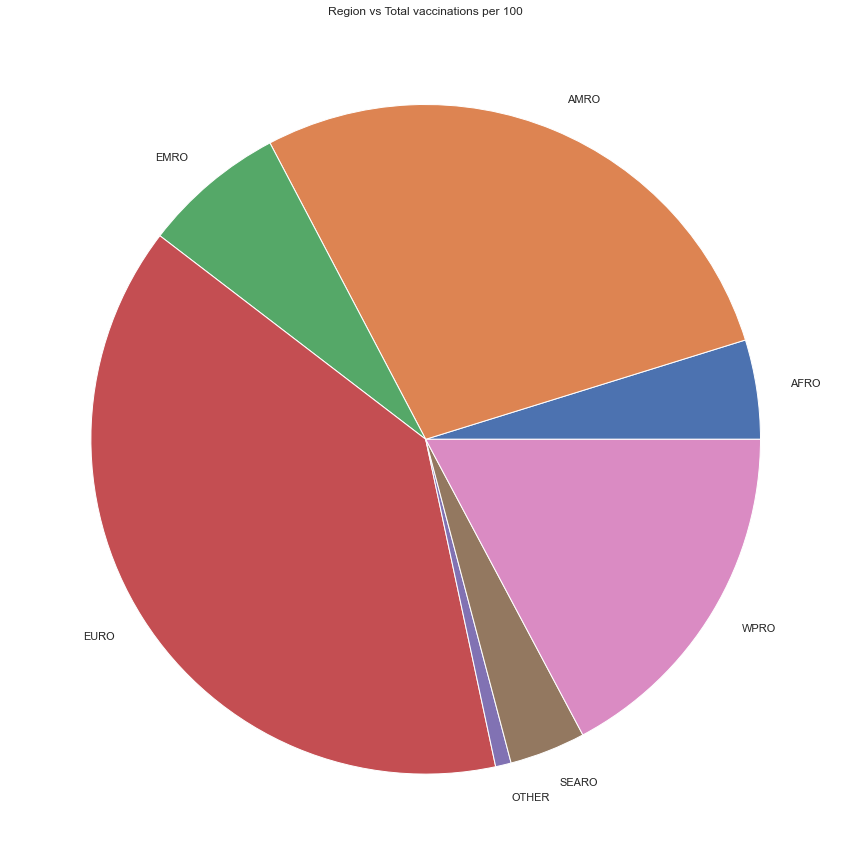

In [24]:
## Region vs Total vaccinations per 100
#
region_count = dataset.groupby('WHO_REGION')['TOTAL_VACCINATIONS_PER100'].sum()
lab = region_count.index.tolist()
data = region_count.values.tolist()

plt.title("Region vs Total vaccinations per 100")
plt.pie(data, labels = lab)
plt.show()
plt.close()

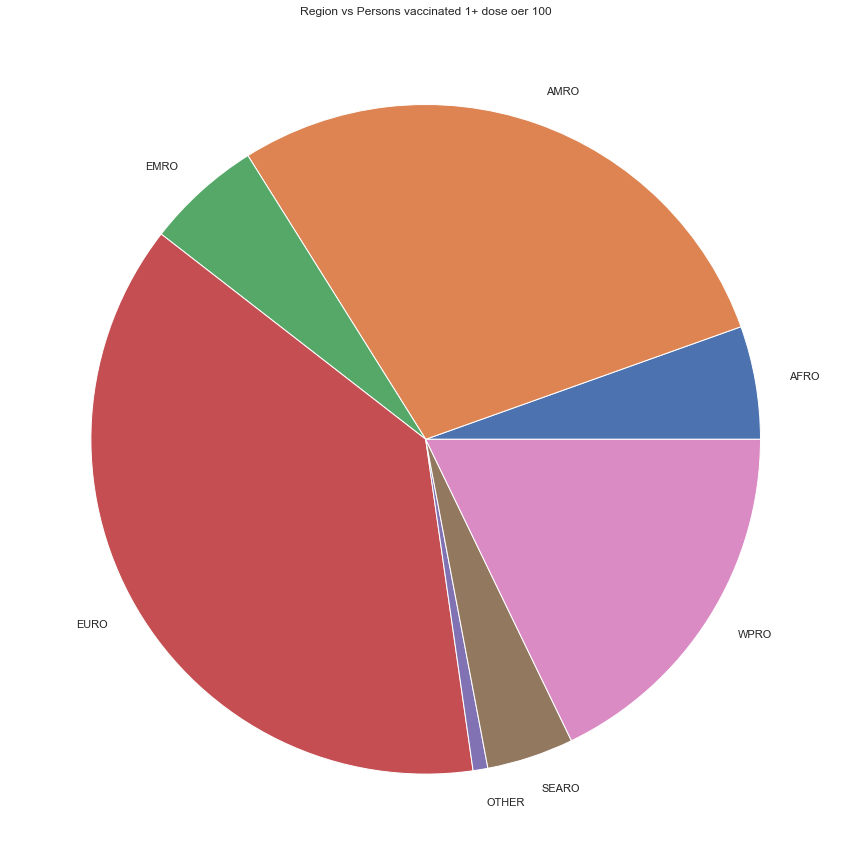

In [25]:
## Region vs Persons vaccinated 1+ dose oer 100
region_count = dataset.groupby('WHO_REGION')['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].sum()
lab = region_count.index.tolist()
data = region_count.values.tolist()

plt.title("Region vs Persons vaccinated 1+ dose oer 100")
plt.pie(data, labels = lab)
plt.show()
plt.close()

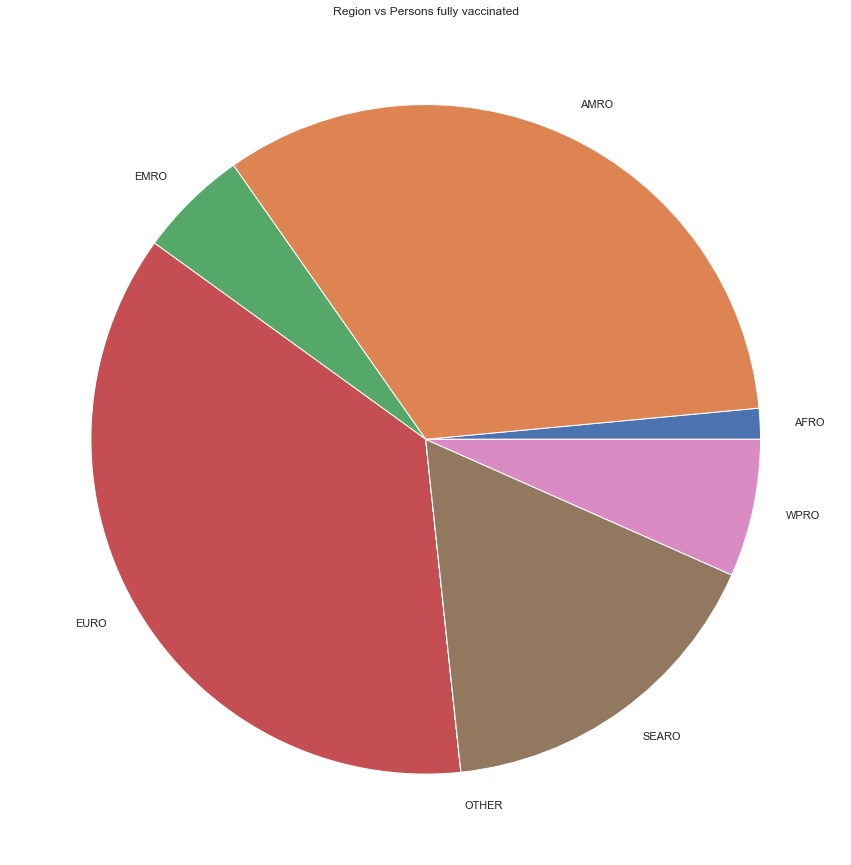

In [26]:
## Region vs Persons fully vaccinated
region_count = dataset.groupby('WHO_REGION')['PERSONS_FULLY_VACCINATED'].sum()
lab = region_count.index.tolist()
data = region_count.values.tolist()

plt.title("Region vs Persons fully vaccinated")
plt.pie(data, labels = lab)
plt.show()
plt.close()

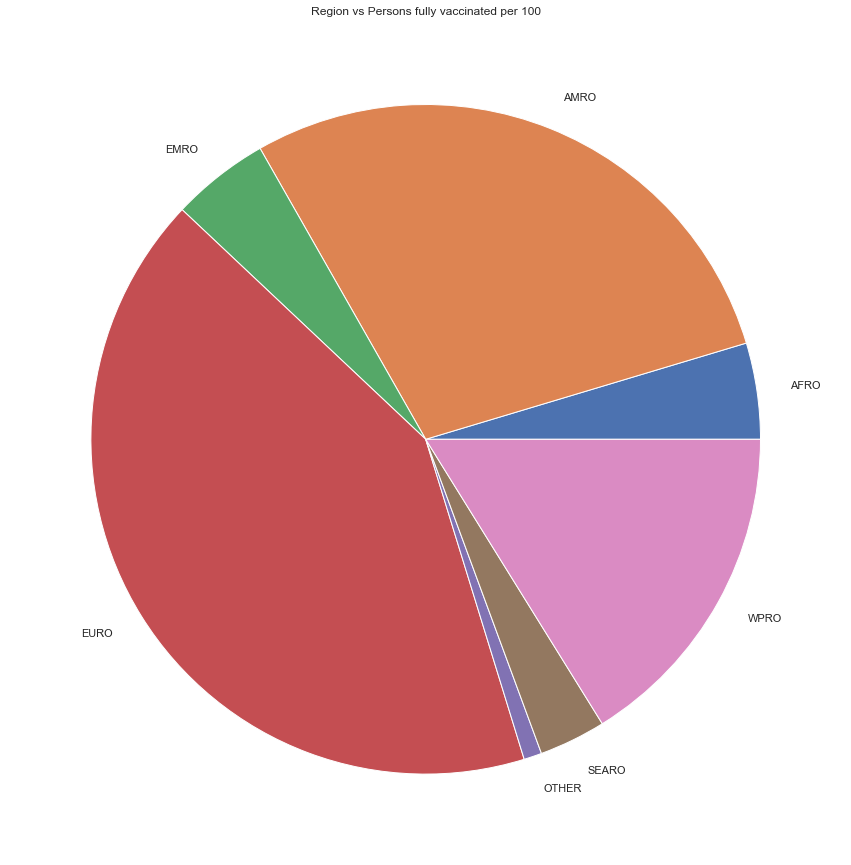

In [27]:
## Region vs Persons fully vaccinated per 100
#
region_count = dataset.groupby('WHO_REGION')['PERSONS_FULLY_VACCINATED_PER100'].sum()
lab = region_count.index.tolist()
data = region_count.values.tolist()

plt.title("Region vs Persons fully vaccinated per 100")
plt.pie(data, labels = lab)
plt.show()
plt.close()


In [ ]:
## End
#